In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [5]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',index_col=0, dtype=sdtypes,)

In [6]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

drop 18 outlier stores

In [9]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3.n_clusters_4 != 2]
stores_clust_info_combined4.shape

(1930, 57)

In [8]:
stores_clust_info_combined3.shape

(1948, 57)

In [10]:
# stores_clust_info_combined4.columns

### drop scaled features

In [11]:
# stores_clust_info_combined4 = 
# stores_clust_info_combined4 = 
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns = ['tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
       'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled',
       'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled', 'cl_High_End_scaled',
       'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled',
       'cl_Popular_Bottles_scaled', 'cl_Quick_Shots_scaled',
       'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled',
       'n_clusters_2', 'n_clusters_4'])

In [12]:
stores_clust_info_combined4.shape

(1930, 41)

### make a copy of stores_clust_info_combined4

In [14]:
stores_clust_info_combined4_copy = stores_clust_info_combined4.copy()

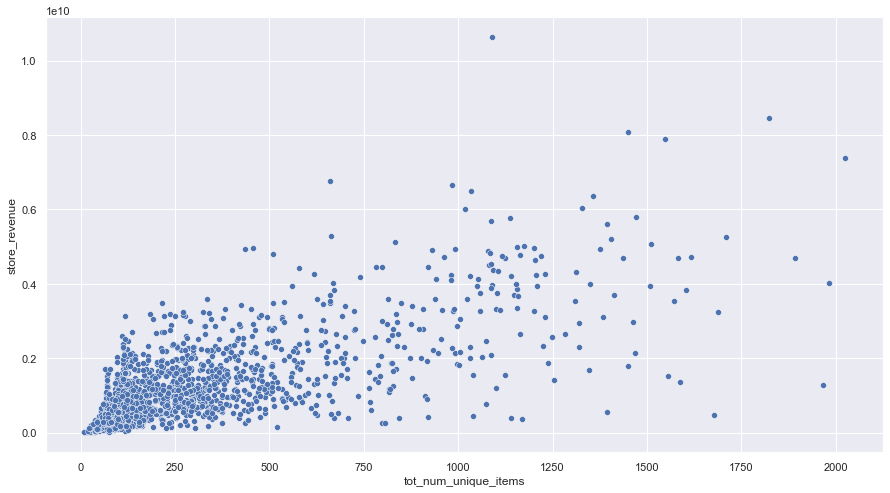

In [16]:
sns.scatterplot(x = 'tot_num_unique_items',y = 'store_revenue',data = stores_clust_info_combined4) #hue='label'
sns.set(rc = {'figure.figsize':(15,8)})

In [18]:
stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,...,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,1.285899e+09,...,2.085453,11.902340,14.394710,94.117647,15.923567,25.313569,46.975898,97.619048,53.669725,62.334802
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,4.694030e+09,...,2.060222,9.825674,14.527205,82.352941,24.203822,25.997719,46.157344,92.857143,42.660550,60.572687
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,4.028390e+09,...,1.966717,7.261725,9.884014,88.970588,31.210191,40.592930,49.022283,92.857143,33.027523,43.171806
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,8.451654e+09,...,1.645639,8.228195,5.595173,63.235294,38.216561,43.443558,46.111869,71.428571,34.403670,22.466960
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.",7.370231e+09,...,1.925926,7.358025,8.691358,85.294118,50.955414,51.197263,46.202819,92.857143,34.174312,38.766520


create outlier data frame

In [19]:
outliers_df = stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

### remove 5 out liers

In [23]:
filt = stores_clust_info_combined4.tot_num_unique_items > 1750

In [24]:
stores_clust_info_combined4 = stores_clust_info_combined4[~filt]

In [ ]:
#      'tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
#      'rev_Cheap',
     
#      'rev_Moderately_High',
#      'rev_Most_Variety',
#      'rev_Popular_Bottles',
#      'rev_Quick_Shots',
#      'rev_Volume_For_Dollar',
#      'item_Cheap',
     
#      'item_Moderately_High',
#      'item_Most_Variety',
#      'item_Popular_Bottles',
#      'item_Quick_Shots',
#      'item_Volume_For_Dollar',
#      'cl_Cheap',
#      'cl_High_End',
#      'cl_Moderately_High',
#      'cl_Most_Variety',
#      'cl_Popular_Bottles',
#      'cl_Quick_Shots',
#      'cl_Volume_For_Dollar'

In [25]:
features = ['store_revenue','tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [26]:
scaled_features = ['store_revenue_scaled','tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [27]:
stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [28]:
stores_clust_info_combined4.head()

,index,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,...,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,...,16.666667,23.333333,0.000000,5.147059,0.0,0.0,0.500227,11.904762,1.605505,0.000000
1,1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,...,16.666667,8.333333,16.666667,6.617647,0.0,0.0,0.545703,14.285714,0.688073,1.321586
2,2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,...,50.000000,0.000000,21.428571,2.205882,0.0,0.0,0.045475,16.666667,0.000000,0.660793
3,3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,...,9.090909,27.272727,18.181818,3.676471,0.0,0.0,0.454752,7.142857,2.064220,1.321586
4,4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,...,23.076923,7.692308,0.000000,3.676471,0.0,0.0,0.181901,7.142857,0.229358,0.000000


In [29]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [30]:
scaler = StandardScaler()

In [31]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

scale features

In [33]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [34]:
stores_clust_info_combined4[scaled_features].describe()

,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03
mean,-3.041723e-16,4.559124e-16,-3.837334e-16,1.085827e-15,9.458523e-18,9.654326e-16,-8.679925e-17,-3.535700e-16,4.664523e-15,-2.375272e-15,9.902613e-17,2.361170e-16,2.168540e-16,1.313812e-15,-3.031947e-15
std,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00
min,-1.020902e+00,-8.831768e-01,-2.708895e+00,-5.567705e-01,-1.042762e+00,-5.183858e+00,-1.154418e+00,-1.970671e+00,-4.381004e-01,-4.962549e-01,-6.762061e-01,-3.378037e+00,-8.518686e-01,-7.939812e-01,-5.145251e+00
25%,-6.592579e-01,-6.029907e-01,-6.883176e-01,-5.567705e-01,-7.215954e-01,-7.089685e-01,-8.022215e-01,-6.348712e-01,-4.381004e-01,-4.962549e-01,-5.769715e-01,-6.131570e-01,-6.691035e-01,-6.603319e-01,-9.568132e-01
50%,-3.198050e-01,-4.510825e-01,-1.112155e-01,-5.022023e-01,-3.918256e-01,1.117443e-01,-3.605455e-01,-2.039682e-01,-4.381004e-01,-4.476198e-01,-4.715348e-01,7.806298e-02,-4.080104e-01,-5.044077e-01,9.029618e-02
75%,3.027486e-01,2.071860e-01,5.278121e-01,1.610449e-01,3.975995e-01,8.228840e-01,6.788762e-01,4.854766e-01,-1.194368e-01,-5.853897e-02,1.300746e-01,6.310390e-01,2.447222e-01,3.865879e-01,1.137406e+00
max,8.727601e+00,4.855575e+00,8.849417e+00,1.071925e+01,6.130693e+00,2.029725e+00,4.158417e+00,3.286346e+00,1.039646e+01,8.695779e+00,5.116610e+00,2.428211e+00,5.571020e+00,5.019765e+00,1.137406e+00


In [35]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.7279811881545474

In [36]:
stores_clust_info_combined4.shape

(1925, 56)

In [37]:
stores_clust_info_combined4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1925 non-null   object 
 1   Store_Name                        1925 non-null   object 
 2   Address                           1925 non-null   object 
 3   City                              1925 non-null   object 
 4   Zip_Code                          1925 non-null   object 
 5   Store_Location                    1769 non-null   object 
 6   County_Number                     1925 non-null   int64  
 7   County                            1925 non-null   object 
 8   Store_Name.1                      1925 non-null   object 
 9   store_revenue                     1925 non-null   float64
 10  tot_num_unique_items              1925 non-null   int64  
 11  num_unique_clusters               1925 non-null   int64  
 12  tot_it

In [54]:
from sklearn.metrics import silhouette_score

cluster_cols = [       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.45807343703409104
number of clusters =  3   silhouette score =  0.36503364720014525
number of clusters =  4   silhouette score =  0.3786468051172379
number of clusters =  5   silhouette score =  0.2981394052237185
number of clusters =  6   silhouette score =  0.2907625270229206
number of clusters =  7   silhouette score =  0.2947988747243796
number of clusters =  8   silhouette score =  0.2916058068579459
number of clusters =  9   silhouette score =  0.24789811872727135
number of clusters =  10   silhouette score =  0.2396685711927571


In [38]:
from sklearn.metrics import silhouette_score

cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,6):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.4475062643557119
number of clusters =  3   silhouette score =  0.3835062078437221
number of clusters =  4   silhouette score =  0.4223344841413703
number of clusters =  5   silhouette score =  0.34369039286063285


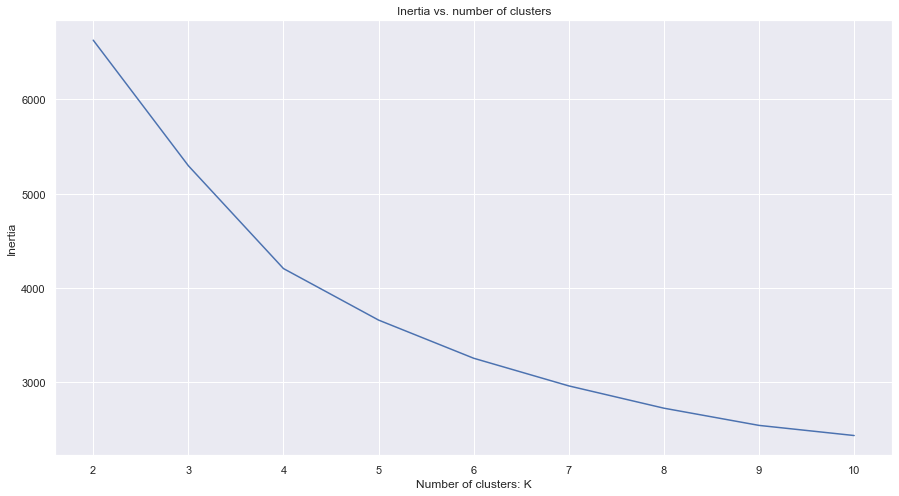

In [47]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


In [48]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

In [ ]:
# !pip install plotly 


In [49]:

# THEN:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(df, cols, **kwargs):
    df = df.loc[:, cols]
    df = df.to_numpy()
    if 'scaletype' in kwargs and kwargs['scaletype'] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    scaler.fit(df)
    X = scaler.transform(df)
    dff = pd.DataFrame(X, columns = cols)
    return dff, scaler

def get_kmeans(data, cols, n_clusters = 3, random_state = 42, **kwargs):
    data, scaler = scale(df = data, cols = cols, **kwargs)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 10, tol = 1e-04, random_state = random_state)
    kmeans.fit(data)
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = kmeans.labels_
    polars = clusters.groupby('label').mean().reset_index()
    polars = pd.melt(polars, id_vars = ['label'])
    fig = px.line_polar(polars, r='value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polars, clusters, scaler

def get_clusters(data, cols, cluster_labels):
    data = data[cols]
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = cluster_labels
    polar = clusters.groupby('label').mean().reset_index()
    polar = pd.melt(polar, id_vars = ['label'])
    fig = px.line_polar(polar, r = 'value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polar, clusters, scaler





    
    
 


In [50]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

In [51]:

df_scaled = scale(stores_clust_info_combined4, cols1)
fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# plt.figure(figsize = (12,10))
fig.update_layout(
    autosize=False,
    width=400,
    height=400,)
fig.show()

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600,)
# fig.show()



C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is depreca

Red is large supermarkets and large liquor stores
Blue is convenience stores
green is in the middle so that is smaller liquor stores and grocery stores

Philippe Heitzmann4:24 PM

1. Red = Supermarkets with lots of alcohol variety
1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

In [52]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']


df_scaled = scale(stores_clust_info_combined4, cols1)
fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# plt.figure(figsize = (12,10))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600,)
# fig.show()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is depreca

1. Red supermarkets and liquor stores with a larger variety 

In [ ]:



cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

model = KMeans(n_clusters=4, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [ ]:
stores_clust_info_combined4.groupby(['label']).agg({'Store_Number':'count','store_revenue_scaled':['mean','median','std'],
                                                    'tot_num_unique_items_scaled':['mean','median','std'],
 'rev_Cheap_scaled':['mean','median','std'],
 'rev_Moderately_High_scaled':['mean','median','std'],
 'rev_Most_Variety_scaled':['mean','median','std'],
 'rev_Popular_Bottles_scaled':['mean','median','std'],
 'rev_Volume_For_Dollar_scaled':['mean','median','std'],})

In [ ]:
stores_clust_info_combined4.groupby(['label']).agg({'Store_Number':'count','store_revenue':['mean','median','std'],
                                                    'tot_num_unique_items':['mean','median','std'],
 'rev_Cheap':['mean','median','std'],
 'rev_Moderately_High':['mean','median','std'],
 'rev_Most_Variety':['mean','median','std'],
 'rev_Popular_Bottles':['mean','median','std'],
 'rev_Volume_For_Dollar':['mean','median','std'],})

In [ ]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
cols1 = ['A','B','C','D']
df_scaled = scale(df, cols1)
fig, polars, clusters, scaler = get_kmeans(df, cols = cols1)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
plt.figure(figsize = (12,10))
fig.show()

In [ ]:
cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,6):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

In [ ]:
plt.plot(range(2,6), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [ ]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

In [ ]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [ ]:
stop

In [ ]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

model = KMeans(n_clusters=2, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['n_clusters_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [ ]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [ ]:
stores_clust_info_combined4.groupby(['n_clusters_2']).agg({'tot_num_unique_items':['mean','median'],
                                                         'rev_Cheap':['mean','median'],
                                                          'rev_Moderately_High':['mean','median'],
                                                          'rev_Most_Variety':['mean','median'],
                                                          'rev_Popular_Bottles':['mean','median'],
                                                          'rev_Volume_For_Dollar':['mean','median'],
                                                          'cl_Cheap':['mean','median'],
                                                          'cl_High_End':['mean','median'],
                                                          'cl_Moderately_High':['mean','median'],
                                                          'cl_Most_Variety':['mean','median'],
                                                          'cl_Popular_Bottles':['mean','median'],
                                                          
                                                          'cl_Volume_For_Dollar':['mean','median']})

In [ ]:
# cluster_cols = ['tot_num_unique_items_scaled',
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled', 
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

# model = KMeans(n_clusters=4, random_state=42)

# model.fit(stores_clust_info_combined2[cluster_cols])

# stores_clust_info_combined2['n_clusters_4'] = model.predict(stores_clust_info_combined2[cluster_cols])

In [ ]:
stores_clust_info_combined4.groupby(['n_clusters_2']).agg({'Store_Number':'count','num_unique_clusters':['mean','median','std'],'tot_num_unique_items':['mean','median','std'],
                                                         'rev_Cheap':['mean','median','std'],
                                                           'rev_High_End':['mean','median','std'],
                                                          'rev_Moderately_High':['mean','median','std'],
                                                          'rev_Most_Variety':['mean','median','std'],
                                                          'rev_Popular_Bottles':['mean','median','std'],
                                                          'rev_Volume_For_Dollar':['mean','median','std'],
                                                          'cl_Cheap':['mean','median','std'],
                                                         'cl_High_End':['mean','median','std'],
                                                          'cl_Moderately_High':['mean','median','std'],
                                                          'cl_Most_Variety':['mean','median','std'],
                                                          'cl_Popular_Bottles':['mean','median','std'],
                                                          
                                                          'cl_Volume_For_Dollar':['mean','median','std']})

In [ ]:
cols = ['Store_Name',  'City', 'Zip_Code',
        'County', 
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar']

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.n_clusters_2==1,cols]

In [ ]:
clust1_of_2_no_outlier_stores = stores_clust_info_combined4.loc[stores_clust_info_combined4.n_clusters_2==1,cols]

In [ ]:
clust1_of_2_no_outlier_stores.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clust1_of_2_no_outlier_stores.csv')

In [ ]:
# stores_clust_info_combined3 = stores_clust_info_combined2.copy()

In [ ]:
# stores_clust_info_combined3.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv')